In [1]:
import psycopg2 as pg
import pandas.io.sql as pd_sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'ccfraud',    # DB that we are connecting to
    'port': 5432          # port for psql
}

connection = pg.connect(**connection_args)

query = 'SELECT * FROM ccdata'

df = pd_sql.read_sql(query, connection)

In [5]:
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359810,-0.072781,2.536350,1.378160,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191860,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358350,-1.340160,1.773210,0.379780,-0.503198,1.800500,0.791461,0.247676,-1.514650,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792990,-0.863291,-0.010309,1.247200,0.237609,0.377436,-1.387020,...,-0.108300,0.005274,-0.190321,-1.175580,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158230,0.877737,1.548720,0.403034,-0.407193,0.095922,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881100,10.071800,-9.834780,-2.066660,-5.364470,-2.606840,-4.918220,7.305330,1.914430,...,0.213454,0.111864,1.014480,-0.509348,1.436810,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058420,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016230,-0.606624,-0.395255,0.068473,-0.053527,24.79,0
284804,172788.0,1.919560,-0.301254,-3.249640,-0.557828,2.630520,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
# df.isnull().sum()
#gives view per column

In [4]:
from pandas_profiling import ProfileReport

# profile = ProfileReport(df, minimal=True)
# profile
#kaggle highlighted a power transform was applied to the 28 variables, so perhaps transformation is only required
#on the remaining 'Time' and 'Amount' columns


In [12]:
#remember to rebind to the df

from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

#correct error message
#Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample
#df.values returns whatever slice or dataframe as an array, so rmb to plug that in so that
#data is in the right format for fit_transform to work

df.drop(['Amount', 'Time'], axis = 1, inplace = True)
#syntax  --- df.drop([row or column, row or column, row or column], axis = 0 or 1, inplace = True)
#axis = 1 means will drop columns, axis = 0 means will drop rows
#there is no need to rebind df = df.drop
# as you have passed inplace = True
#which drops it permanently

In [6]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


0.001727485630620034


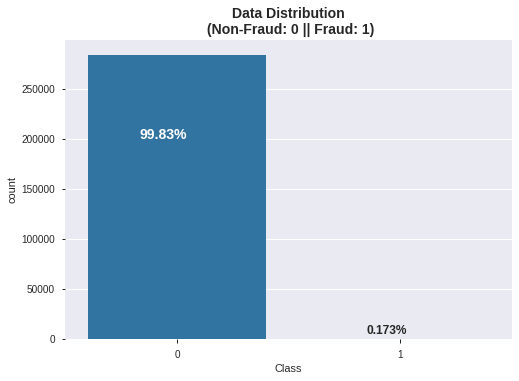

In [7]:
fraudcount = len(df[df['Class'] == 1])/len(df['Class'])

print(fraudcount)

#visual rep of the classes
sns.countplot('Class', data = df)
plt.title('Data Distribution\n (Non-Fraud: 0 || Fraud: 1)', fontsize = 14, fontweight = 'bold')
plt.annotate((str(round(fraudcount*100, 3)) + '%'), xy=(.85, 5000.5), fontsize = 12, fontweight = 'bold')
plt.annotate((str(round(100 - fraudcount*100, 2)) + '%'), xy=(-.17, 200000.5), 
             fontsize = 14, fontweight = 'bold', color = 'white');

#how do you add the labels?
#KWARGS key word arguments found:
#https://matplotlib.org/api/text_api.html#matplotlib.text.Text

In [8]:
#split the data
#so you have ytest before further data manipulation

from sklearn.model_selection import StratifiedKFold


X = df.drop(['Class'], axis = 1)
y = df['Class']

fivestratfolds = StratifiedKFold(n_splits = 5, shuffle = False, random_state = 42)
#this feeds in parameters, telling sklearn how to split data

#is there a difference if you put shuffle on your kfolds or not?
# your data is not a time series data, or ordered data (where you must maintain the flow)
#so you can shuffle if you want

whatevergenerator = fivestratfolds.split(X, y)
#this is the actionable function that splits the data
#also this splits X up with respect to y, meaning y is the stratified variable
#its also a generator object (lazy), meaning that you will have to call upon it to get your results

for training, testing in whatevergenerator:
    Xtraining, ytraining = X.iloc[training], y.iloc[training]
    Xtesting, ytesting = X.iloc[testing], y.iloc[testing]
#NOTE! the split returns the test index! so 'training' returns the index for the values!
#not the values themselves!
#so you need to call on pandas dataframe, then feed in the index to get your training and testing sets
    #rmb for pandas, iloc is for indexed, loc is for 'named' data
    #if no iloc[,] comma is passed, pandas will slice the entire row

In [9]:
print('df columns:', len(df.iloc[1,:]))
print('Xtesting columns:', len(Xtesting.columns), '(because you dropped y column)')

df columns: 31
Xtesting columns: 30 (because you dropped y column)


In [10]:
#okay with the StratifiedKFold split above
#you have 20% of your data as a test set and 80% as training set

#you should do your over and undersampling on the 80% training set

# Xtraining['classagain'] = ytraining

# trainingdf = Xtraining

#because you did not drop with inplace = True, will Xtraining['Class'] = ytraining
#rewrite in your core dataframe???
#also is newdf = df.drop(whatever)
#the sam as df.drop(whatever, inplace = True)


In [11]:
#what's the way to do under and oversampling with the outlier detection
#undersample first RUS or nearmiss, up to you
#then outlier detection
#then remove interquartile range
#then you do your oversampling
#should ask the TAs about this
#WWWWWWWWWWWWWWWWWWWWWWWWWWw


In [12]:
#since ADASYN relies on the decision line
#you should do oversampling first, then undersampling - so that when you scale to bigger data sets
#it will more closely emulate the decision line/boundary

print('size of Xtraining: ', len(Xtraining))

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler

doublefraudpercent = ADASYN(sampling_strategy='minority', random_state=None, n_neighbors=5, n_jobs=1, ratio=fraudcount * 2)

Xresampled, yresampled = doublefraudpercent.fit_resample(Xtraining, ytraining)
print('size of Xresampled(w ADASYN): ', len(Xresampled))

rus = RandomUnderSampler(random_state=42, ratio = 1)

Xresampled, yresampled = rus.fit_resample(Xresampled, yresampled)
print('size of Xresampled(w ADASYN + undersampling): ', len(Xresampled))

size of Xtraining:  227846


Using TensorFlow backend.


size of Xresampled(w ADASYN):  228235
size of Xresampled(w ADASYN + undersampling):  1566


In [16]:
#'see' the data through dimensionality reduction (PCA, TSNE, etc)

import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(Xresampled)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit(Xresampled)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

#to get .components_ .get_covariance() etc. it needs to be .fit(whatever)
#not .fit_transform(whatever)
#because fit_transform applies the dimensionality reduction on X already
#there's no variance to explain from there onward!!!

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(Xresampled)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.6e+01 s
PCA took 0.0046 s


In [17]:
X_reduced_pca.get_covariance()

array([[ 2.44117244e+01, -1.40592605e+01,  2.52971052e+01,
        -9.06447470e+00,  1.62238910e+01,  2.63580098e+00,
         2.31950988e+01, -1.84865704e+00,  6.93935818e+00,
         1.55495845e+01, -7.25950051e+00,  1.30989126e+01,
        -4.12520773e-01,  1.05069644e+01,  6.93913195e-01,
         1.03830775e+01,  1.87534450e+01,  7.32413724e+00,
        -1.86507427e+00, -1.82052698e+00,  1.57484878e-02,
        -1.60243062e-01, -4.03040697e-01, -1.22342573e-01,
        -1.63841192e-01,  8.41829781e-02,  4.55283232e-01,
         1.33593726e-01,  1.20530604e-01,  5.22942338e-01],
       [-1.40592605e+01,  1.12085251e+01, -1.63414288e+01,
         6.06579794e+00, -1.04072052e+01, -1.86725058e+00,
        -1.48462945e+01,  1.68297352e+00, -4.58401968e+00,
        -1.02919567e+01,  5.01976949e+00, -9.00544737e+00,
         3.02517202e-01, -7.40881463e+00, -4.16377705e-01,
        -7.09990431e+00, -1.27453772e+01, -4.93408433e+00,
         1.31866444e+00,  1.14131867e+00,  1.12961497e-

In [18]:
print('X_reduced_tsne rows: ', len(X_reduced_tsne))
print('X_reduced_tsne rows: ', len(X_reduced_tsne[0]))
#X_reduced_tsne has 1566 rows and 2 columns (for the x y plane coordinates)

print('yresampled rows:', len(y))
yresampled == 1
#INTERESTING! you can apply true false on an array it seems!

X_reduced_tsne rows:  1566
X_reduced_tsne rows:  2
yresampled rows: 284807


array([False, False, False, ...,  True,  True,  True])

In [19]:
# test = np.array([np.random.randint(0,3) for x in range(0, len(yresampled))])

# #ah you get it finally
# #c can take in a list, or a single dimension array. smart enough to parse it correctly

# arraytest = np.array([[1,2,3], [2,4,3]])

# for x in arraytest:
#     print(x[0])
    
# yresampled == 1

1
2


array([False, False, False, ...,  True,  True,  True])

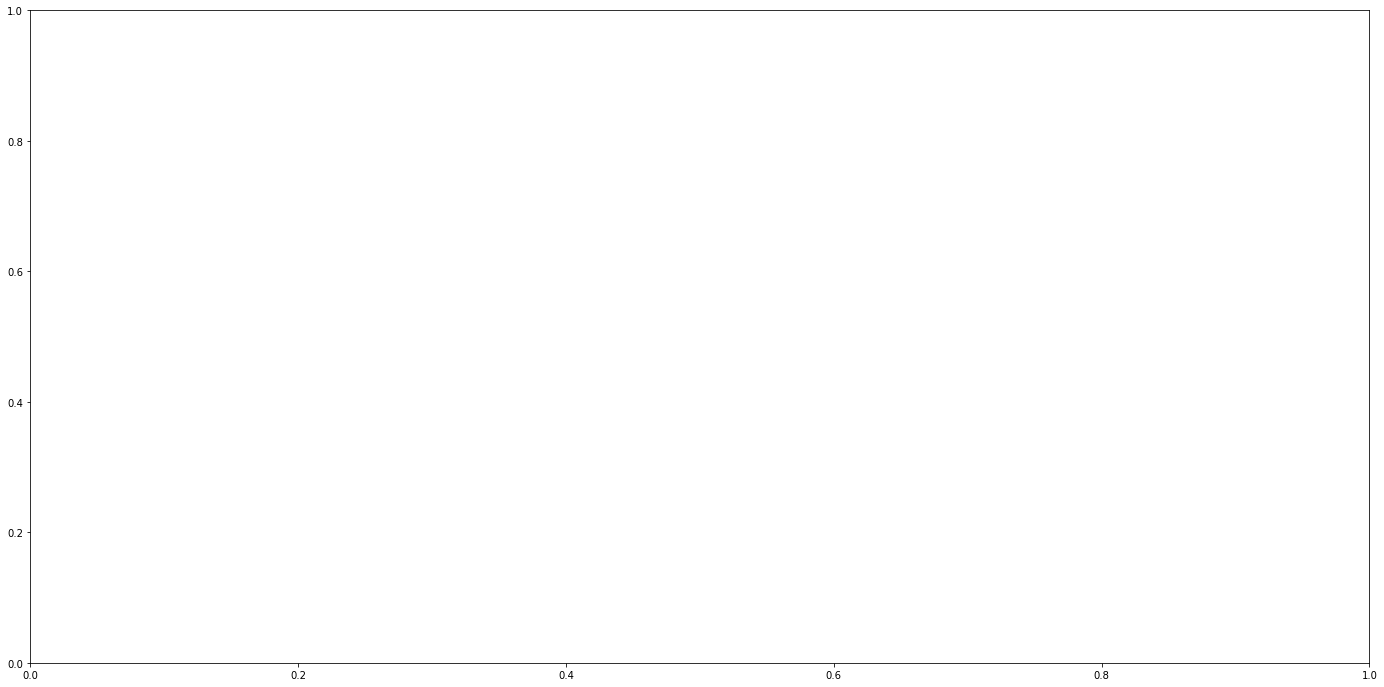

In [7]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1, 1, figsize=(24,12))
labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(yresampled == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(yresampled == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch], fontsize = 18)


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(yresampled == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(yresampled == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(yresampled == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(yresampled == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#really don't get the syntax.


In [21]:
#test various models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Classifiers = {'logisticregression': LogisticRegression(),
             'randomforest': RandomForestClassifier(),
             'svectorclassifier': SVC(),
              'KNN': KNeighborsClassifier(),
             }

# .values converts whatever dataframe into an array!
print('resampled variables columns=', len(Xresampled[0]))
print('original variables columns =', len(X.values[0]))


resampled variables columns= 30
original variables columns = 30


In [22]:
#train with Xresampled
#then do cross validation
from sklearn.model_selection import cross_val_predict

#import your measurables
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

CVscores_unoptimized = {}
CVscores_columns = ['precision', 'recall', 'f1-score', 'AUC ROC']

for key, classifier in Classifiers.items():
    modelpredictions = cross_val_predict(classifier, Xresampled, yresampled, cv = 5)
    a = round(precision_score(modelpredictions, yresampled), 3)
    b = round(recall_score(modelpredictions, yresampled), 3)
    c = round(f1_score(modelpredictions, yresampled), 3)
    d = round(roc_auc_score(modelpredictions, yresampled), 3)
    toupdate= {key: [a, b, c, d]}
    CVscores_unoptimized.update(toupdate)

CVscores_unoptimized
#put results to a csv that can be easily manipulated into ppt

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

{'logisticregression': [0.861, 0.936, 0.897, 0.904],
 'randomforest': [0.884, 0.972, 0.926, 0.933],
 'svectorclassifier': [0.918, 0.937, 0.928, 0.929],
 'KNN': [0.927, 0.913, 0.92, 0.92]}

In [23]:
#test xgboost
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=Xresampled,label=yresampled)
xgclassifier = xgb.XGBClassifier()
model = xgclassifier.fit(Xresampled,yresampled)

modelpredictions = model.predict(Xresampled)
a = round(precision_score(modelpredictions, yresampled), 3)
b = round(recall_score(modelpredictions, yresampled), 3)
c = round(f1_score(modelpredictions, yresampled), 3)
d = round(roc_auc_score(modelpredictions, yresampled), 3)
toupdate = {'xgboost': [a, b, c, d]}
CVscores_unoptimized.update(toupdate)
CVscores_unoptimized

{'logisticregression': [0.861, 0.936, 0.897, 0.904],
 'randomforest': [0.884, 0.972, 0.926, 0.933],
 'svectorclassifier': [0.918, 0.937, 0.928, 0.929],
 'KNN': [0.927, 0.913, 0.92, 0.92],
 'xgboost': [0.999, 0.994, 0.996, 0.996]}

In [25]:
#best parameters from gridsearch
log_reg_bestparams = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
rtree_bestparams = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
svc_bestparams = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
KNN_bestparams = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [26]:
#testing with optimized parameters
optimized_classifiers = {'logisticregression': log_reg_bestparams,
             'randomforest': rtree_bestparams,
             'svectorclassifier': svc_bestparams,
              'KNN': KNN_bestparams,
             }

CVscores_optimized = {}

for key, classifier in optimized_classifiers.items():
    modelpredictions = cross_val_predict(classifier, Xresampled, yresampled, cv = 5)
    a = round(precision_score(modelpredictions, yresampled), 3)
    b = round(recall_score(modelpredictions, yresampled), 3)
    c = round(f1_score(modelpredictions, yresampled), 3)
    d = round(roc_auc_score(modelpredictions, yresampled), 3)
    toupdate= {key: [a, b, c, d]}
    CVscores_optimized.update(toupdate)

CVscores_optimized

/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xtzie/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

{'logisticregression': [0.861, 0.936, 0.897, 0.904],
 'randomforest': [0.829, 0.973, 0.895, 0.912],
 'svectorclassifier': [0.918, 0.937, 0.928, 0.929],
 'KNN': [0.928, 0.955, 0.942, 0.943]}

In [27]:
#let's compare optimized and unoptimized

print(CVscores_unoptimized)
# print(CVscores_optimized)

{'logisticregression': [0.861, 0.936, 0.897, 0.904], 'randomforest': [0.884, 0.972, 0.926, 0.933], 'svectorclassifier': [0.918, 0.937, 0.928, 0.929], 'KNN': [0.927, 0.913, 0.92, 0.92], 'xgboost': [0.999, 0.994, 0.996, 0.996]}


In [28]:
#check for overfitting with the very first/original testing set
#WWWWWWWWWWWWWW
#should you test on resampled testing data (i.e random undersample it)
#or the plain testing data
Xtestingresampled, ytestingresampled = rus.fit_resample(Xtesting, ytesting)

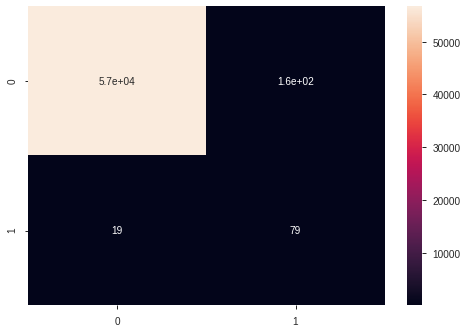

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix

data_dmatrix = xgb.DMatrix(data=Xresampled,label=yresampled)
xgclassifier = xgb.XGBClassifier()
model = xgclassifier.fit(Xresampled,yresampled)

threshold = 0.8

fraudprobarray = model.predict_proba(Xtesting.values)
fraudprob = fraudprobarray[:, 1]
thresholdvals = np.array([1 if x > threshold else 0 for x in fraudprob])

modelpredictions = model.predict_proba(Xtesting.values)

test = confusion_matrix(ytesting, thresholdvals)

#sum of row0 = actual non frauds len(ytesting[ytesting == 0])
#sum of row1 = actual frauds len(ytesting[ytesting == 1])

sns.heatmap(test, annot = True)

In [30]:
#AUC ROC curve here
from sklearn.metrics import roc_curve

In [31]:
#finishing touches - UMAP distribution
#fine tune hyper parameters

In [32]:
from sklearn.metrics import classification_report

#you don't have to undersample your test set.
#but look at what the precision and recall is

f1 = f1_score
#easypeasy
#can use this as the quick ditsy metric
f1fortesting = f1_score(ytesting, ypredicted_testing)
roctesting = roc_auc_score(ytesting, ypredicted_testing)

#inputs, and outputs
#next you need to understand

confusionframe = pd.DataFrame(confusion_matrix(ytesting, ypredicted_testing))
confusionframe.columns = ['Non Fraud', 'Fraud']
confusionframe

#WWWWWWWWWWWWWwWWWWWWW
#what is a good score to use when shortlisting models?
#F1, ROC, 
#how does cross validation return the predicted scores?
roctesting

NameError: name 'ypredicted_testing' is not defined

In [ ]:
roc_curve(ytesting, ypredicted_testing)